# Exploración de Datos con el Dataset de Pingüinos
## Materia: Aprendizaje de Máquina - Clase 2
### Grupo: 502
### Nombre: Daniel Cureño Martinez
### Fecha: 29 de septiembre de 2025

Este reporte realiza un Análisis Exploratorio de Datos (EDA) del dataset "penguins" de Seaborn, siguiendo las instrucciones de la clase. Incluye estadísticas descriptivas, visualizaciones y la actividad práctica final.

## Introducción
El dataset "penguins" contiene datos de tres especies de pingüinos en las islas Palmer, Antártida: Adelie, Gentoo y Chinstrap. Incluye variables como longitud del pico, profundidad del pico, longitud de aleta, masa corporal, sexo e isla.

Para contextualizar, aquí hay imágenes de las especies:

- **Adelie Penguin**:
![Adelie Penguin](https://storage.googleapis.com/oceanwide_web/media-dynamic/cache/widen_1600/media/default/0001/22/14cadebf3246ceb96b939c2325ccfd1f1c4618e8.jpeg)

<grok-card data-id="f01a2a" data-type="image_card"></grok-card>



- **Gentoo Penguin**:
![Gentoo Penguin](https://www.antarctica.gov.au/site/assets/files/45561/rs35470_dsc_4869.1600x0.jpg)

<grok-card data-id="9b61dd" data-type="image_card"></grok-card>



- **Chinstrap Penguin**:
![Chinstrap Penguin](https://www.antarctica.gov.au/site/assets/files/67423/rs57281.1600x0.jpg)

<grok-card data-id="38030c" data-type="image_card"></grok-card>



Objetivo: Explorar la estructura, distribuciones y patrones para preparar análisis en machine learning.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno  # Ya instalado en Anaconda

# Cargar el dataset
penguins = sns.load_dataset('penguins')

# Mostrar las primeras filas
penguins.head()

Matplotlib is building the font cache; this may take a moment.


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## Parte 1: Estructura Básica del Dataset
Aquí examinamos la forma, tipos de datos y valores nulos.

In [2]:
print("Forma del dataset:", penguins.shape)
print("\nTipos de datos:")
print(penguins.dtypes)
print("\nValores nulos:")
print(penguins.isnull().sum())

Forma del dataset: (344, 7)

Tipos de datos:
species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

Valores nulos:
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


## Parte 2: Estadística Descriptiva
Resumen de variables numéricas y distribución de categóricas.

In [3]:
# Descripción numérica
penguins.describe()

# Distribución categórica
print("Especies:")
print(penguins['species'].value_counts())

print("\nIslas:")
print(penguins['island'].value_counts())

print("\nSexo:")
print(penguins['sex'].value_counts(dropna=False))

Especies:
species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

Islas:
island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

Sexo:
sex
Male      168
Female    165
NaN        11
Name: count, dtype: int64


## Parte 3: Visualizaciones Exploratorias
Gráficos para detectar patrones.

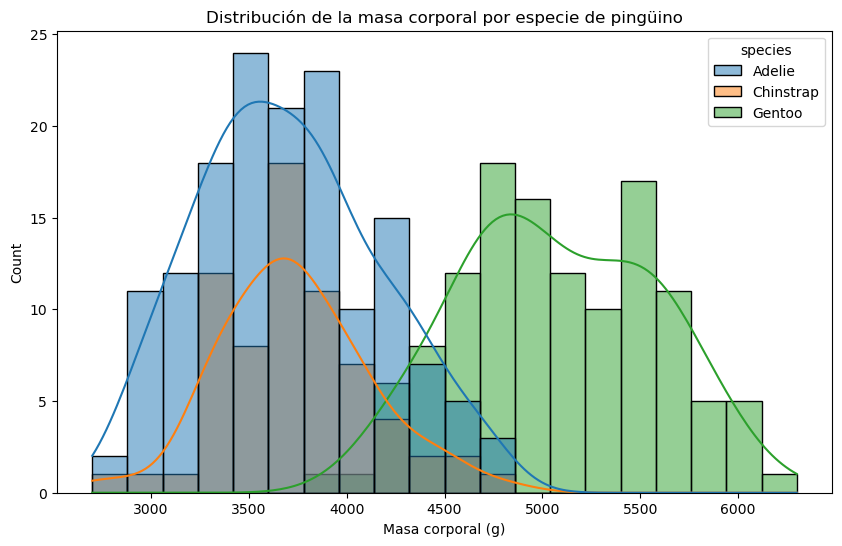

In [4]:
plt.figure(figsize=(10,6))
sns.histplot(data=penguins, x='body_mass_g', hue='species', kde=True, bins=20)
plt.title("Distribución de la masa corporal por especie de pingüino")
plt.xlabel("Masa corporal (g)")
plt.show()

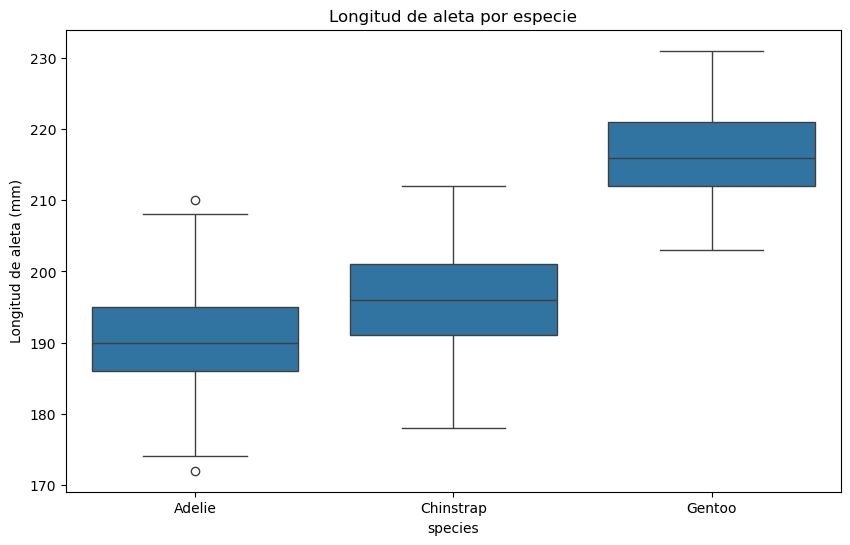

In [5]:
plt.figure(figsize=(10,6))
sns.boxplot(data=penguins, x='species', y='flipper_length_mm')
plt.title("Longitud de aleta por especie")
plt.ylabel("Longitud de aleta (mm)")
plt.show()

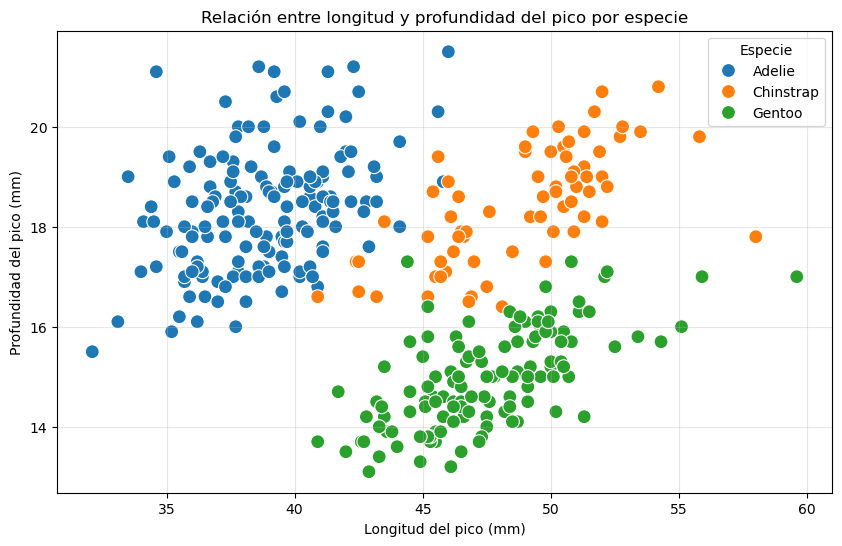

In [6]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='species', s=100)
plt.title("Relación entre longitud y profundidad del pico por especie")
plt.xlabel("Longitud del pico (mm)")
plt.ylabel("Profundidad del pico (mm)")
plt.legend(title='Especie')
plt.grid(True, alpha=0.3)
plt.show()

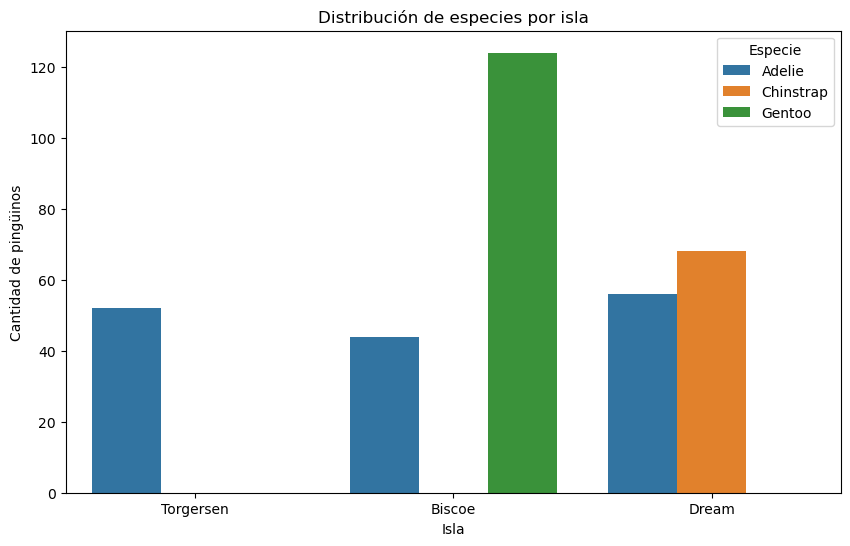

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(data=penguins, x='island', hue='species')
plt.title("Distribución de especies por isla")
plt.xlabel("Isla")
plt.ylabel("Cantidad de pingüinos")
plt.legend(title='Especie')
plt.show()

## Parte 4: Detección de Valores Atípicos y Nulos
Boxplots para outliers y matriz de nulos.

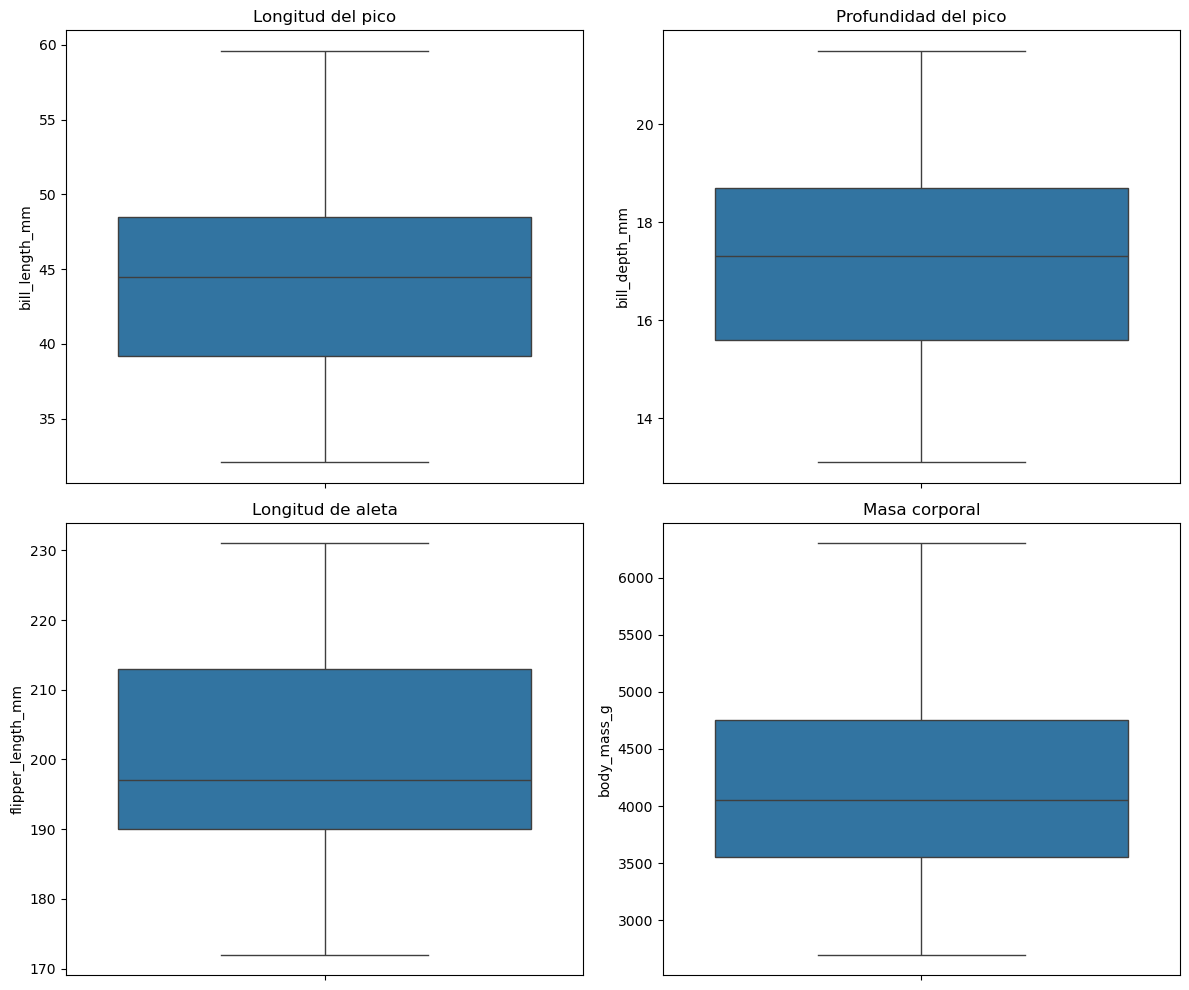

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(12,10))

sns.boxplot(ax=axes[0,0], data=penguins, y='bill_length_mm')
axes[0,0].set_title('Longitud del pico')

sns.boxplot(ax=axes[0,1], data=penguins, y='bill_depth_mm')
axes[0,1].set_title('Profundidad del pico')

sns.boxplot(ax=axes[1,0], data=penguins, y='flipper_length_mm')
axes[1,0].set_title('Longitud de aleta')

sns.boxplot(ax=axes[1,1], data=penguins, y='body_mass_g')
axes[1,1].set_title('Masa corporal')

plt.tight_layout()
plt.show()

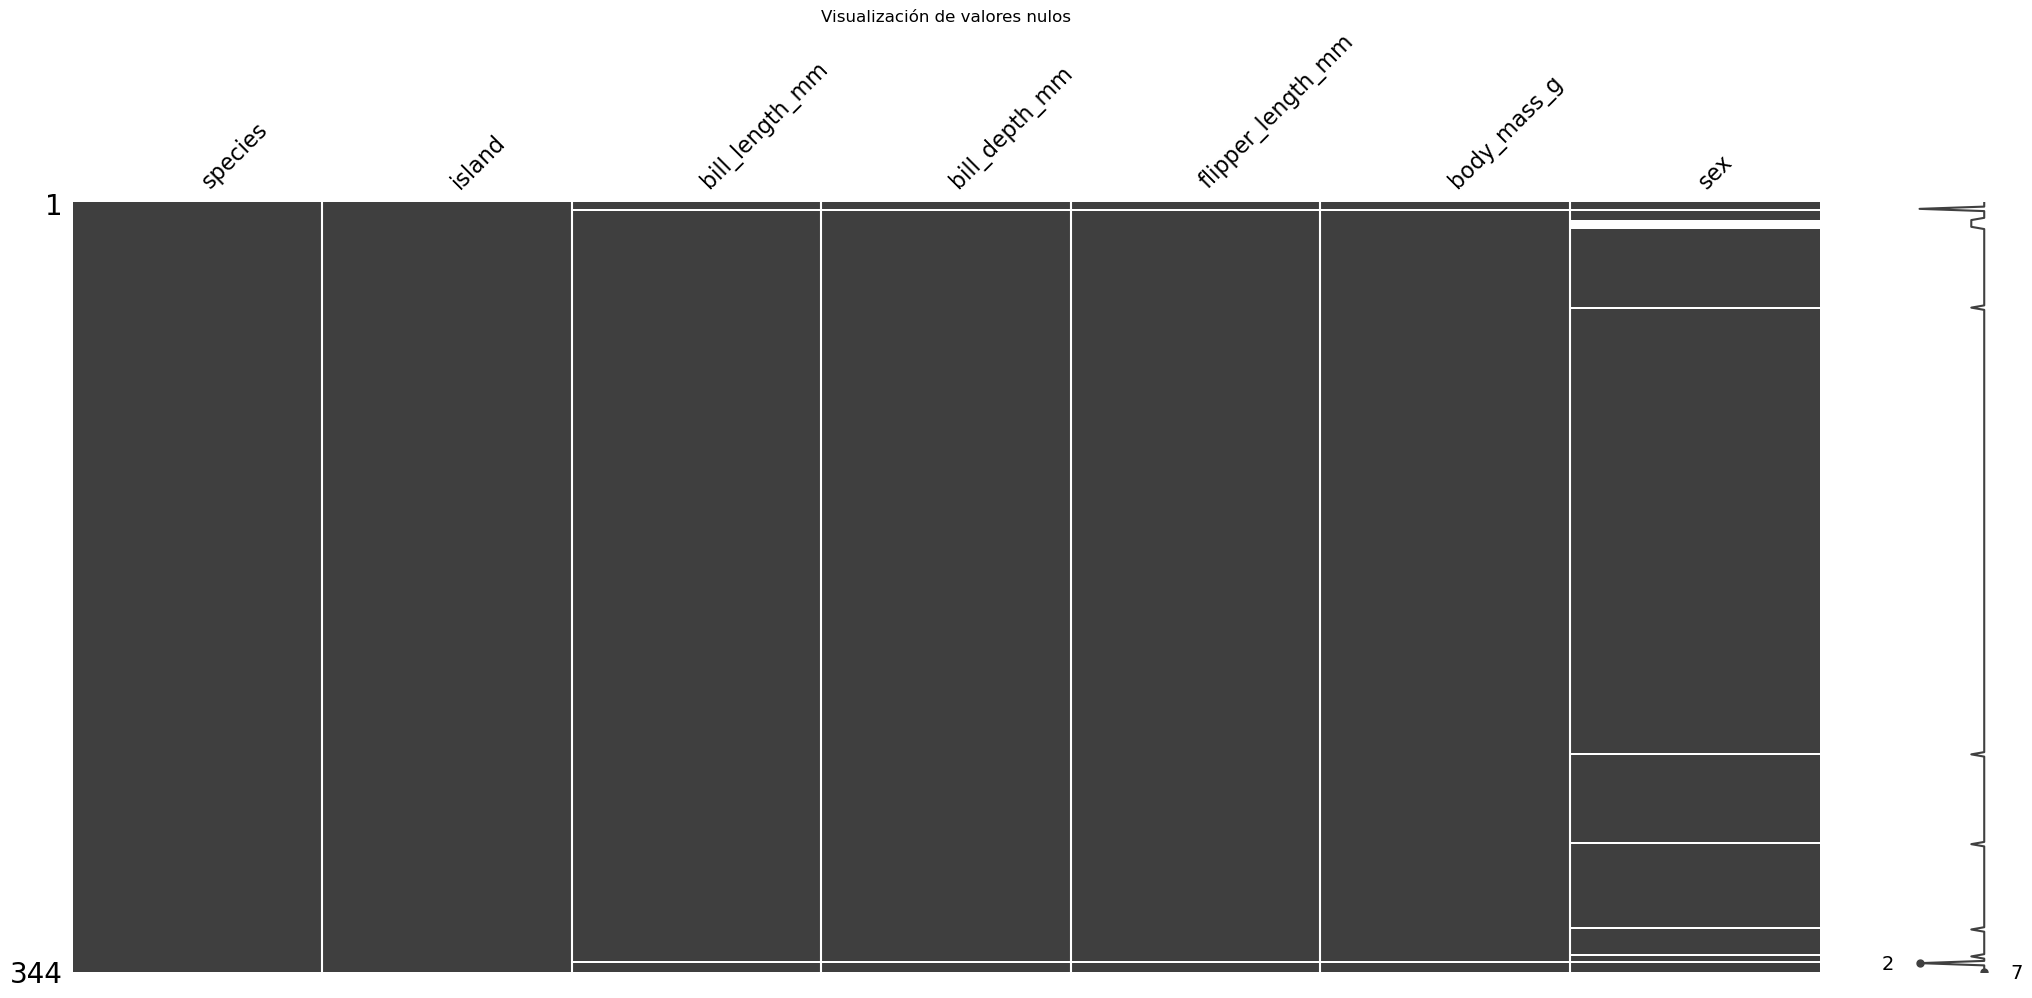

In [9]:
msno.matrix(penguins)
plt.title("Visualización de valores nulos")
plt.show()

## Actividad Práctica Final
Respuestas a las preguntas y gráficos nuevos.

In [10]:
# 1. ¿Cuántos pingüinos hay por sexo en cada especie?
count_by_species_sex = penguins.groupby(['species', 'sex']).size().unstack(fill_value=0)
count_by_species_sex['NaN'] = penguins[penguins['sex'].isna()].groupby('species').size().reindex(count_by_species_sex.index, fill_value=0)
print(count_by_species_sex)

sex        Female  Male  NaN
species                     
Adelie         73    73    6
Chinstrap      34    34    0
Gentoo         58    61    5


Interpretación: Hay un balance casi igual entre machos y hembras en todas las especies, con algunos NaN en Adelie y Gentoo.

In [11]:
# 2. ¿Existe correlación entre la masa corporal y la longitud de la aleta?
correlation = penguins[['body_mass_g', 'flipper_length_mm']].corr(method='pearson').iloc[0,1]
print(f"Coeficiente de correlación de Pearson: {correlation:.2f}")

Coeficiente de correlación de Pearson: 0.87


Interpretación: Sí, hay una correlación positiva fuerte (0.87), lo que indica que pingüinos con aletas más largas suelen tener mayor masa corporal.

In [12]:
# 3. ¿Qué isla tiene la mayor diversidad de especies?
species_per_island = penguins.groupby('island')['species'].nunique()
print(species_per_island)
max_diversity = species_per_island.max()
islands_with_max = ', '.join(species_per_island[species_per_island == max_diversity].index)
print(f"La(s) isla(s) con mayor diversidad ({max_diversity} especies) es(son): {islands_with_max}")

island
Biscoe       2
Dream        2
Torgersen    1
Name: species, dtype: int64
La(s) isla(s) con mayor diversidad (2 especies) es(son): Biscoe, Dream


Interpretación: Biscoe y Dream tienen la mayor diversidad con 2 especies cada una.

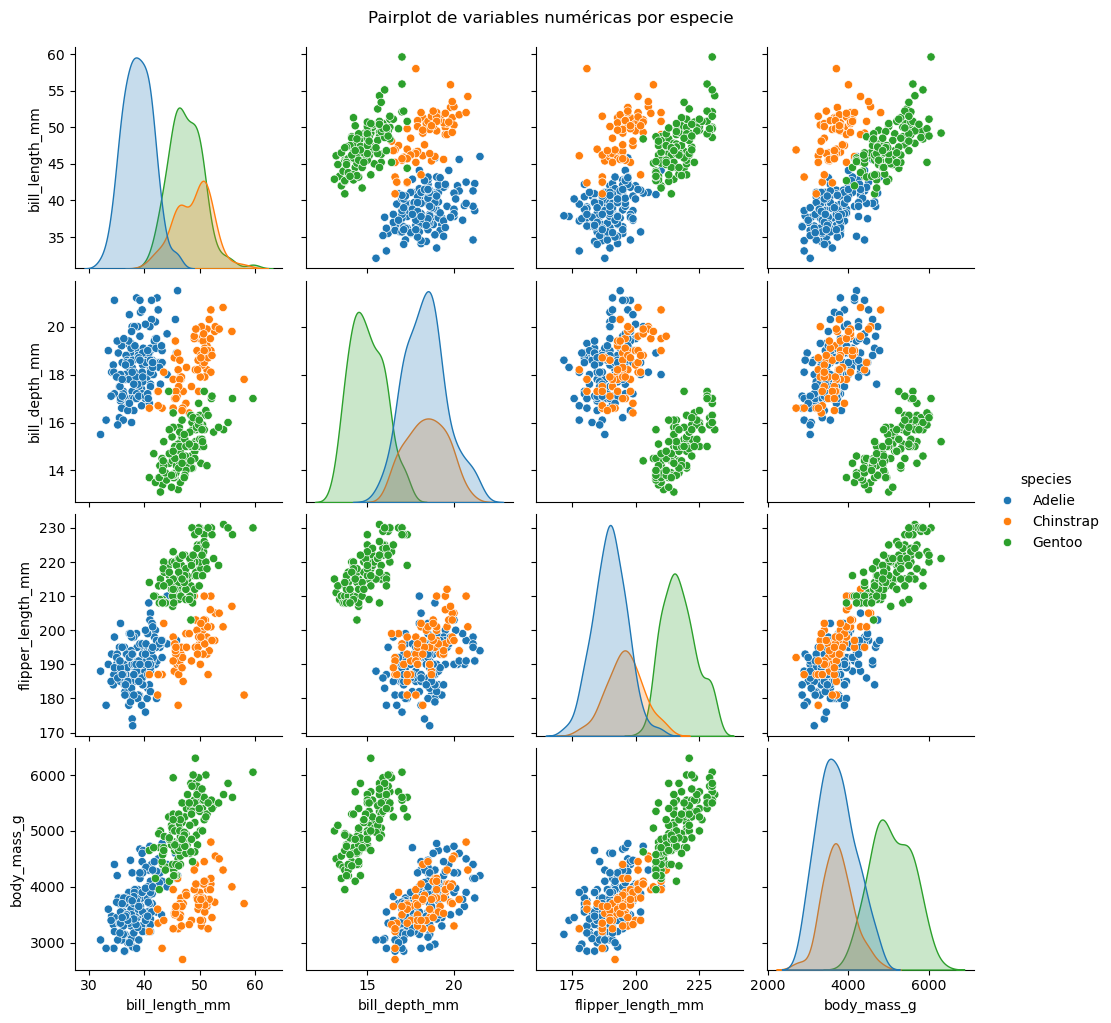

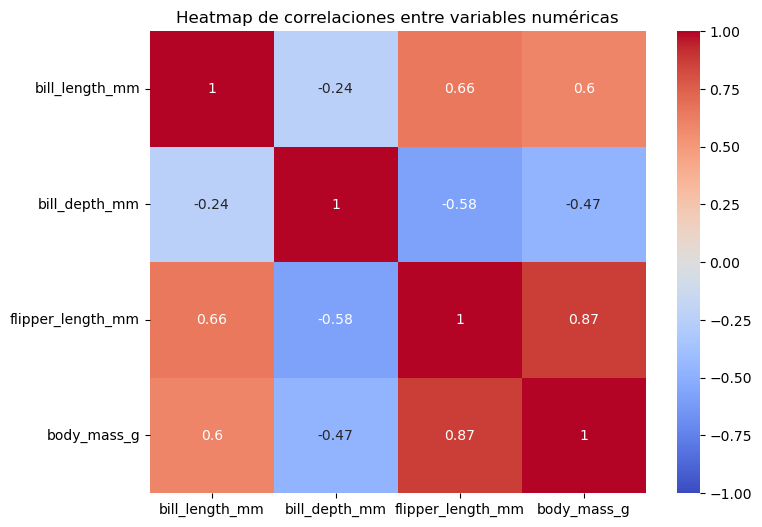

In [13]:
# 4. Dos gráficos nuevos no mostrados en clase

# Gráfico 1: Pairplot de variables numéricas por especie
sns.pairplot(penguins, hue='species', vars=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'])
plt.suptitle("Pairplot de variables numéricas por especie", y=1.02)
plt.show()

# Gráfico 2: Heatmap de correlaciones
corr_matrix = penguins.select_dtypes(include='number').corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Heatmap de correlaciones entre variables numéricas")
plt.show()

## Hallazgos Más Interesantes
En este EDA del dataset de pingüinos, descubrí que las especies muestran un balance casi perfecto entre machos y hembras, con Adelie teniendo el mayor número (73 de cada sexo, más 6 sin clasificar), lo que sugiere una recolección de datos equilibrada excepto por algunos faltantes. La correlación fuerte (0.87) entre la masa corporal y la longitud de la aleta indica que estas medidas están relacionadas con el tamaño general del pingüino, posiblemente adaptaciones para la supervivencia en el agua, y podría ser útil para modelos predictivos en machine learning. Además, las islas Biscoe y Dream destacan por su diversidad con dos especies cada una, reflejando patrones ecológicos donde Adelie actúa como especie "puente" en múltiples hábitats. Estos hallazgos, visualizados en nuevos gráficos como el pairplot y el heatmap, confirman cómo variables morfológicas separan claramente las especies, abriendo puertas a análisis de clasificación, y enfatizan la necesidad de manejar NaN para evitar sesgos.

## Conclusión
Este análisis inicial revela patrones claros en el dataset, ideal para tareas de clasificación en ML. Próximos pasos: limpieza de datos y modelado.